<a href="https://colab.research.google.com/github/No0osee/No0osee/blob/main/EX04_05_%E8%BE%A8%E8%AD%98%E9%B3%B6%E5%B0%BE%E8%8A%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 問題定義

## 資料收集

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris( as_frame=True )
X,y = iris.data, iris.target
df = iris.frame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 資料前處理

### 資料清理

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### 探索性分析

In [5]:
df_cor=df.corr()
df_cor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


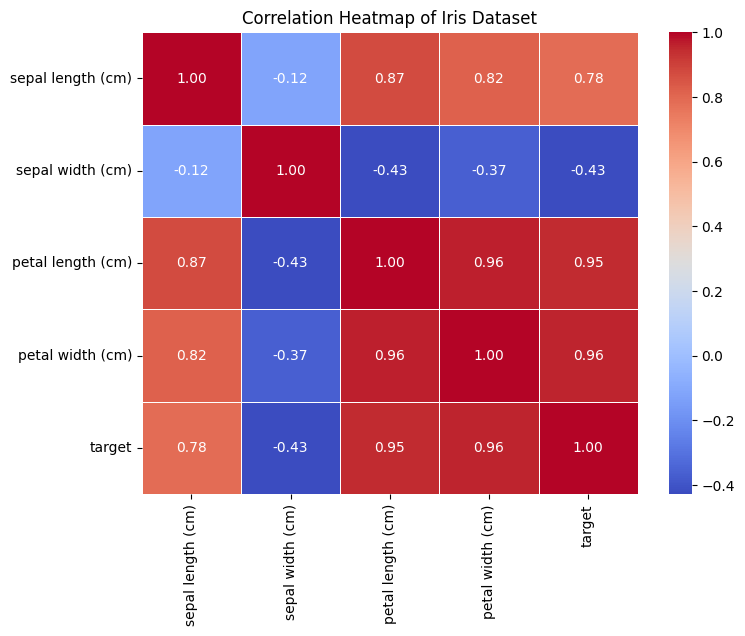

In [6]:
# prompt: 用seaborn顯示df_cor的相關熱圖

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df_cor, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()


### 資料分割

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 類別轉換

### 特徵縮放

In [8]:
# prompt: 幫我將特徵值做標準化

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# You can now use X_train_scaled and X_test_scaled for training your model.
# For demonstration, you can print the first few rows of the scaled data.
print("Scaled X_train:")
print(X_train_scaled[:5])

print("\nScaled X_test:")
print(X_test_scaled[:5])

Scaled X_train:
[[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]
 [-1.23014297  0.75647855 -1.2187007  -1.31260282]
 [-1.7177306   0.30929911 -1.39061772 -1.31260282]]

Scaled X_test:
[[ 0.35451684 -0.58505976  0.55777524  0.02224751]
 [-0.13307079  1.65083742 -1.16139502 -1.17911778]
 [ 2.30486738 -1.0322392   1.8185001   1.49058286]
 [ 0.23261993 -0.36147005  0.44316389  0.4227026 ]
 [ 1.2077952  -0.58505976  0.61508092  0.28921757]]


## 模型訓練

In [9]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=5)
Knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
Knn.score(X_train, y_train)

0.9666666666666667

## 模型評估

In [15]:


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = Knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"準確率: {accuracy:.4f}")
print("\n分類報告:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

準確率: 1.0000

分類報告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## 模型調整

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors": [3, 5, 7], "weights":["uniform","distance"] }
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [18]:
grid.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [19]:
grid.best_score_

np.float64(0.9583333333333334)

## 模型部署

### 儲存模型

In [20]:
# prompt: 幫我儲存knn和scaler模型

import joblib

# Save the trained KNN model
joblib.dump(Knn, 'knn_model.pkl')

# Save the fitted scaler
joblib.dump(scaler, 'scaler.pkl')

print("KNN model and scaler saved successfully.")

KNN model and scaler saved successfully.


### 推論預測

In [21]:
# prompt: 載入knn和scaler

# Load the trained KNN model
loaded_knn_model = joblib.load('knn_model.pkl')

# Load the fitted scaler
loaded_scaler = joblib.load('scaler.pkl')

print("KNN model and scaler loaded successfully.")

KNN model and scaler loaded successfully.


In [23]:
import pandas as pd

data = {
    'sepal length (cm)': [5.1],
    'sepal width (cm)': [3.5],
    'petal length (cm)': [1.4],
    'petal width (cm)': [0.2]
}
virtual_df = pd.DataFrame(data, columns=data.keys())
virtual_df = loaded_scaler.transform(virtual_df)
prediction = loaded_knn_model.predict(virtual_df)
print("The predicted class is:", prediction)
iris_target_names = iris.target_names
predicted_class_name = iris_target_names[prediction[0]]
print("The predicted iris species is:", predicted_class_name)


The predicted class is: [0]
The predicted iris species is: setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
